### **Deep Learning Assignment-2: ANN for Customer Data**

**Name:** Yesha Pandya

**Enrollment Number:** 23BT04175

**Div:** 1 **Batch:** C

**Objective:**

* Scale the data

* Design an ANN model to predict 'Purchased' with one layer and multiple layers

* Show the performance matrix, write recall and precision values

* Write the test values and compare with the predicted values

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv('Customer_Data.csv')

#display the first 5 rows of the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Data Preprocessing & Scaling**

To prepare the data for the Artificial Neural Network, we'll:

* Drop the User ID column as it does not affect purchasing decisions.

* Encode the categorical Gender column into numerical values (0 and 1).

* Split the data into training and testing sets.

* Scale the dataset:
  * Apply StandardScaler so that features like Age and EstimatedSalary are on the same scale (crucial for ANN optimization)

In [2]:
#drop 'User ID' as it is irrelevant for prediction
df = df.drop(columns=['User ID'])

#encode the 'Gender' column (Male -> 1, Female -> 0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#separate Features (X) and Target (y)
X = df.drop(columns=['Purchased'])
y = df['Purchased']

#train-test-split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled!")
print("Input features shape:", X_train_scaled.shape)

Data successfully scaled!
Input features shape: (320, 3)


**Design ANN Model**

We'll create two models:

* Single Layer Model: A simple baseline model with one hidden layer.

* Multi-Layer Model: A deeper network using the architecture specified for this assignment (26 neurons -> 15 neurons -> 1 output neuron)

Note: The input_shape is set dynamically based on our 3 scaled features (Gender, Age, EstimatedSalary).

In [3]:
#model 1: Single Hidden Layer Architecture
model_single = keras.Sequential([
    keras.layers.Dense(10, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_single.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training Single Layer Model...")
model_single.fit(X_train_scaled, y_train, epochs=50, verbose=0)
print("Single Layer Model Training Complete.\n")

#model 2: Multi-Layer Architecture (From assignment reference)
model_multi = keras.Sequential([
    keras.layers.Dense(26, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_multi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Training Multi-Layer Model...")
model_multi.fit(X_train_scaled, y_train, epochs=50, verbose=0)
print("Multi-Layer Model Training Complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Single Layer Model...
Single Layer Model Training Complete.

Training Multi-Layer Model...
Multi-Layer Model Training Complete.


**Model Evaluation: Performance Matrix, Precision, and Recall**

Now we evaluate the multi-layer model using the test dataset. We'll calculate the precision, recall and display the confusion matrix.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



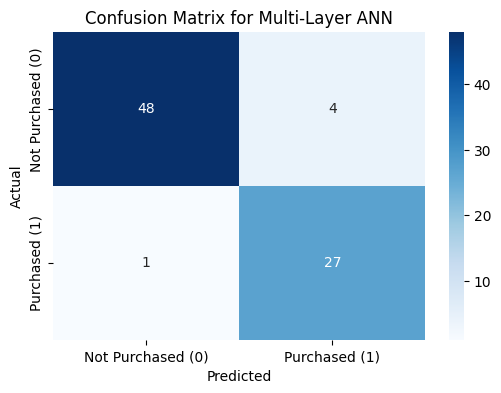

In [4]:
#predict using the Multi-Layer Model
#the output is a probability, so we apply a 0.5 threshold to get binary classes (0 or 1)
y_pred_prob = model_multi.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

#performance matrix
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

#visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased (0)', 'Purchased (1)'],
            yticklabels=['Not Purchased (0)', 'Purchased (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multi-Layer ANN')
plt.show()

**Observations from the Performance Matrix**

Based on the classification report and confusion matrix generated by the Multi-Layer ANN model, here is the breakdown of its performance:

**Key Metrics**
* Precision (Class 1 - Purchased): 0.87

  * Out of all customers the model predicted would make a purchase, 87% actually did. This indicates a low rate of "false alarms."

* Recall (Class 1 - Purchased): 0.96

  * Out of all customers who actually made a purchase, the model successfully identified 96% of them. The model is highly effective at capturing actual buyers.

* F1-Score (Class 1): 0.92

  * This provides a balanced harmonic mean of precision and recall, confirming high robust performance for the minority class.

* Overall Accuracy: 0.94 (94%)

  * The model correctly predicted the outcome (whether "Purchased" or "Not Purchased") for 75 out of 80 total test samples.

**Compare Test Values with Predicted Values**

Finally, we'll create a side-by-side comparison of the actual test data labels v/s the predictions generated by our multi-layer ANN.

In [5]:
#write test values and compare with predicted values
#create a DataFrame to easily view the Actual vs Predicted values side-by-side
comparison_df = pd.DataFrame({
    'Actual_Test_Value': y_test.values,
    'Predicted_Value': y_pred
})

#display the first 20 records to compare manually
print("Comparison of Actual Test Values vs Predicted Values (First 20):")
display(comparison_df.head(20))

#calculate and print the overall exact matches
correct_predictions = (comparison_df['Actual_Test_Value'] == comparison_df['Predicted_Value']).sum()
total_predictions = len(y_test)

print("-" * 30)
print(f"Total Correct Predictions: {correct_predictions} out of {total_predictions}")
print(f"Final Test Accuracy: {(correct_predictions / total_predictions) * 100:.2f}%")

Comparison of Actual Test Values vs Predicted Values (First 20):


,Actual_Test_Value,Predicted_Value
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


------------------------------
Total Correct Predictions: 75 out of 80
Final Test Accuracy: 93.75%
